In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os

In [3]:
os.chdir('D:/Datasets')

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('Website Data.xlsx')

In [6]:
df.head()

,Default Channel Grouping,Month_Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Revenue
0,Organic Search,Feb 2022,10246,9782,12793,0.7352,2.06,00:01:38,0.0030,39,₹39.08
1,Organic Search,Apr 2022,8520,8085,10474,0.7342,1.93,00:01:37,0.0071,74,₹73.57
2,Organic Search,Jun 2021,8400,7844,10626,0.6769,2.04,00:02:05,0.0073,78,₹78.16
3,Organic Search,Sep 2021,7665,7239,9357,0.6972,1.84,00:01:52,0.0068,64,₹64.37
4,Organic Search,May 2022,7591,7163,9623,0.7406,1.81,00:01:38,0.0048,46,₹45.98


In [7]:
df.shape

(480, 11)

In [8]:
df.columns

Index(['Default Channel Grouping', 'Month_Year', 'Users', 'New Users',
       'Sessions', 'Bounce Rate', 'Pages / Session', 'Avg. Session Duration',
       'Ecommerce Conversion Rate', 'Transactions', 'Revenue'],
      dtype='object')

In [9]:
df.describe()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1231.545833,1132.860417,1565.556250,0.538398,2.920917,0.020611,19.810417
std,1601.139655,1502.665570,2016.251546,0.141842,1.724679,0.076190,53.117268
min,14.000000,11.000000,14.000000,0.000000,1.000000,0.000000,0.000000
25%,238.500000,194.500000,290.000000,0.436700,2.077500,0.000000,0.000000
50%,613.500000,561.000000,824.000000,0.551250,2.510000,0.005700,5.000000
75%,1706.000000,1568.500000,2088.250000,0.634150,3.190000,0.010725,16.000000
max,10246.000000,9782.000000,12793.000000,1.000000,16.540000,0.686200,462.000000


In [10]:
df.dtypes

Default Channel Grouping      object
Month_Year                    object
Users                          int64
New Users                      int64
Sessions                       int64
Bounce Rate                  float64
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate    float64
Transactions                   int64
Revenue                       object
dtype: object

In [11]:
df.isna().sum()

Default Channel Grouping     0
Month_Year                   0
Users                        0
New Users                    0
Sessions                     0
Bounce Rate                  0
Pages / Session              0
Avg. Session Duration        0
Ecommerce Conversion Rate    0
Transactions                 0
Revenue                      0
dtype: int64

## EDA

In [12]:
# Seperate Categorical and continous features
def catconsep(df):
    cat = list(df.columns[df.dtypes=='object'])
    con = list(df.columns[df.dtypes!='object'])
    return cat,con

# 1. Univariate Analysis
1. Categorical features - countplot (Barplot), Correlation Heatmap
2. Continous features - Histogram

In [13]:
cat,con = catconsep(df)
cat

['Default Channel Grouping', 'Month_Year', 'Avg. Session Duration', 'Revenue']

In [14]:
con

['Users',
 'New Users',
 'Sessions',
 'Bounce Rate',
 'Pages / Session',
 'Ecommerce Conversion Rate',
 'Transactions']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

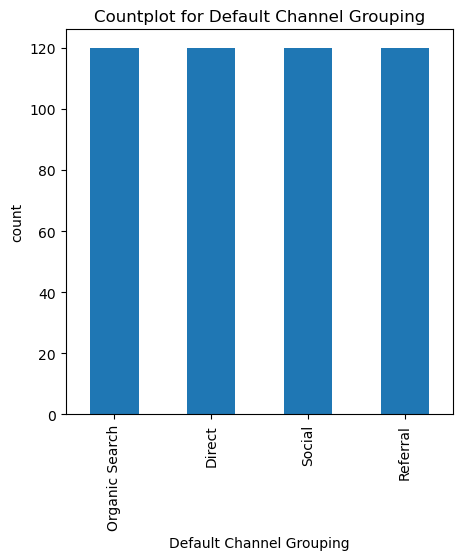

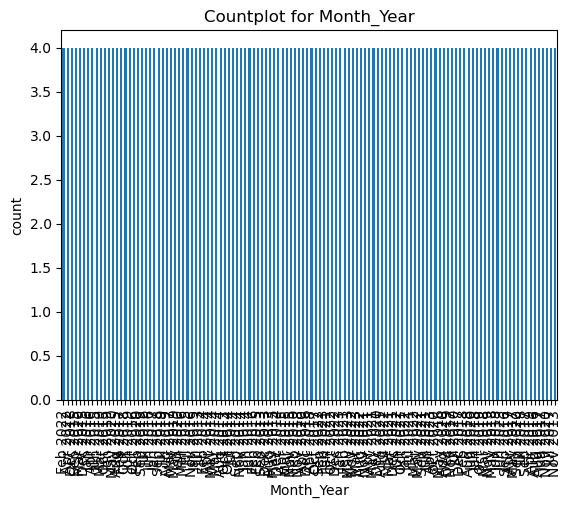

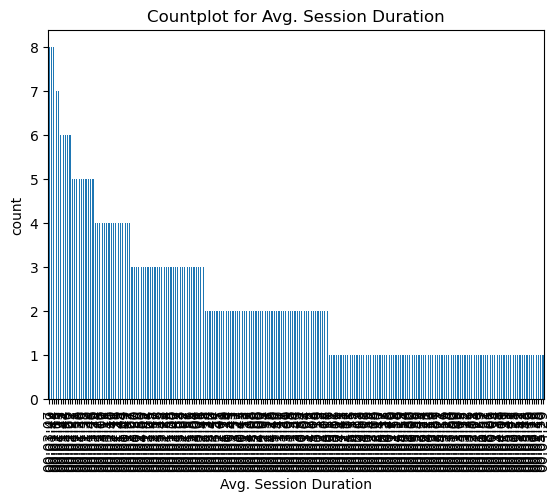

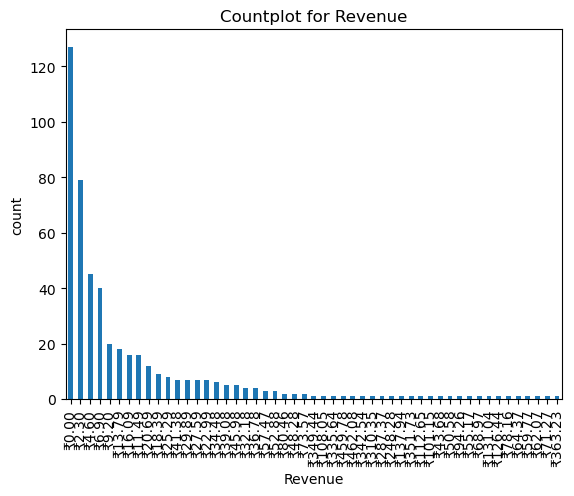

In [16]:
plt.figure(figsize=(5,5))
for i in cat:
    df[i].value_counts().plot(kind='bar',xlabel=f'{i}',ylabel='count',title=f'Countplot for {i}')
    plt.show()

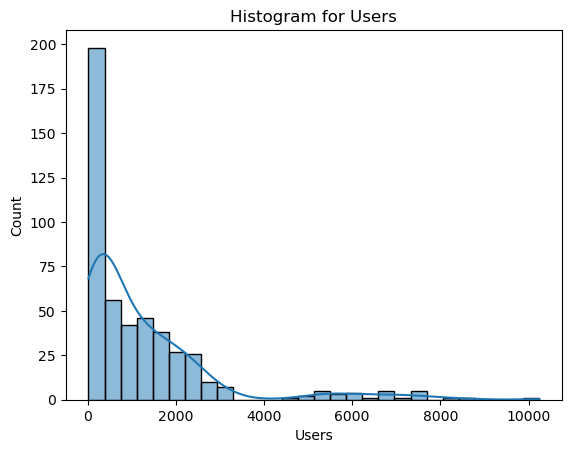

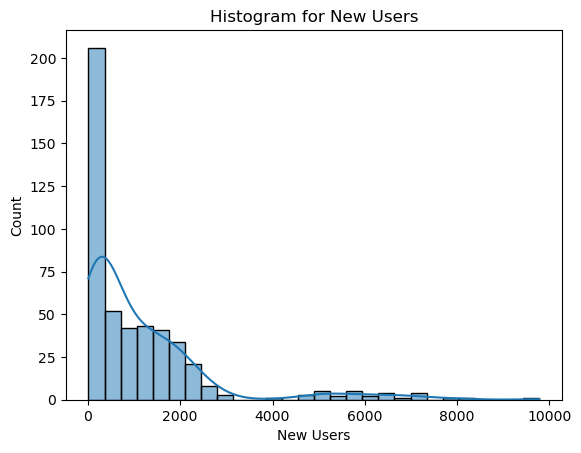

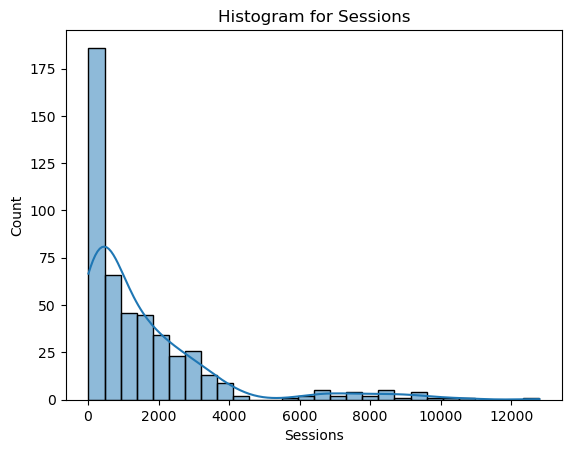

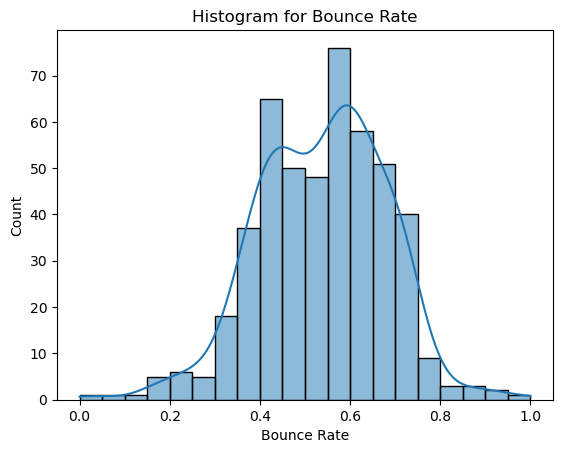

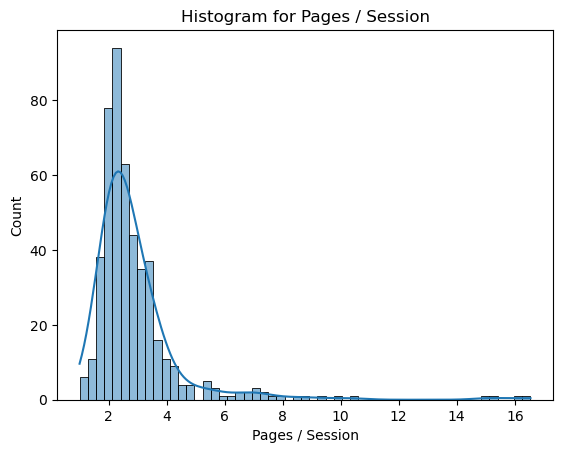

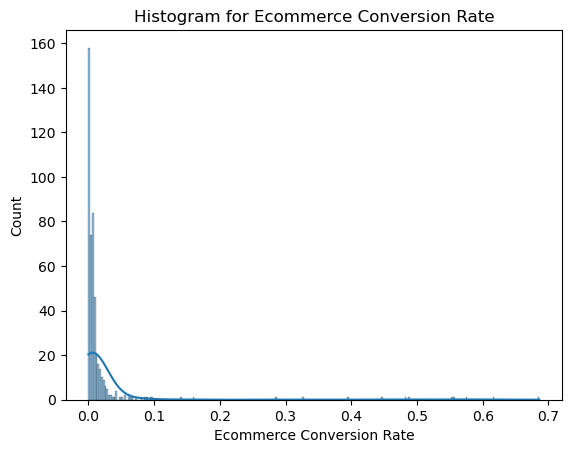

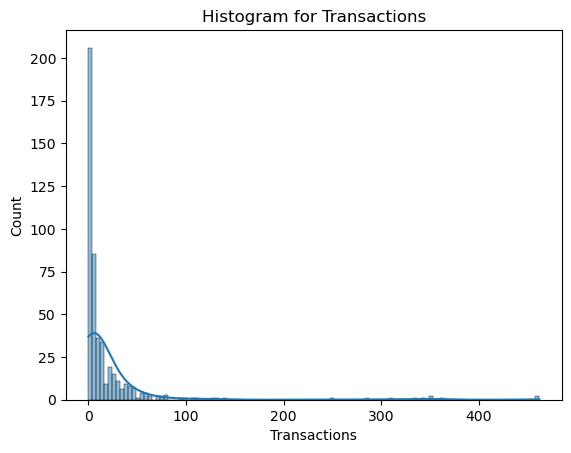

In [17]:
# histogram for continous features
for i in con:
    sns.histplot(data = df, x=i, kde= True )
    plt.title(f'Histogram for {i}')
    plt.show()

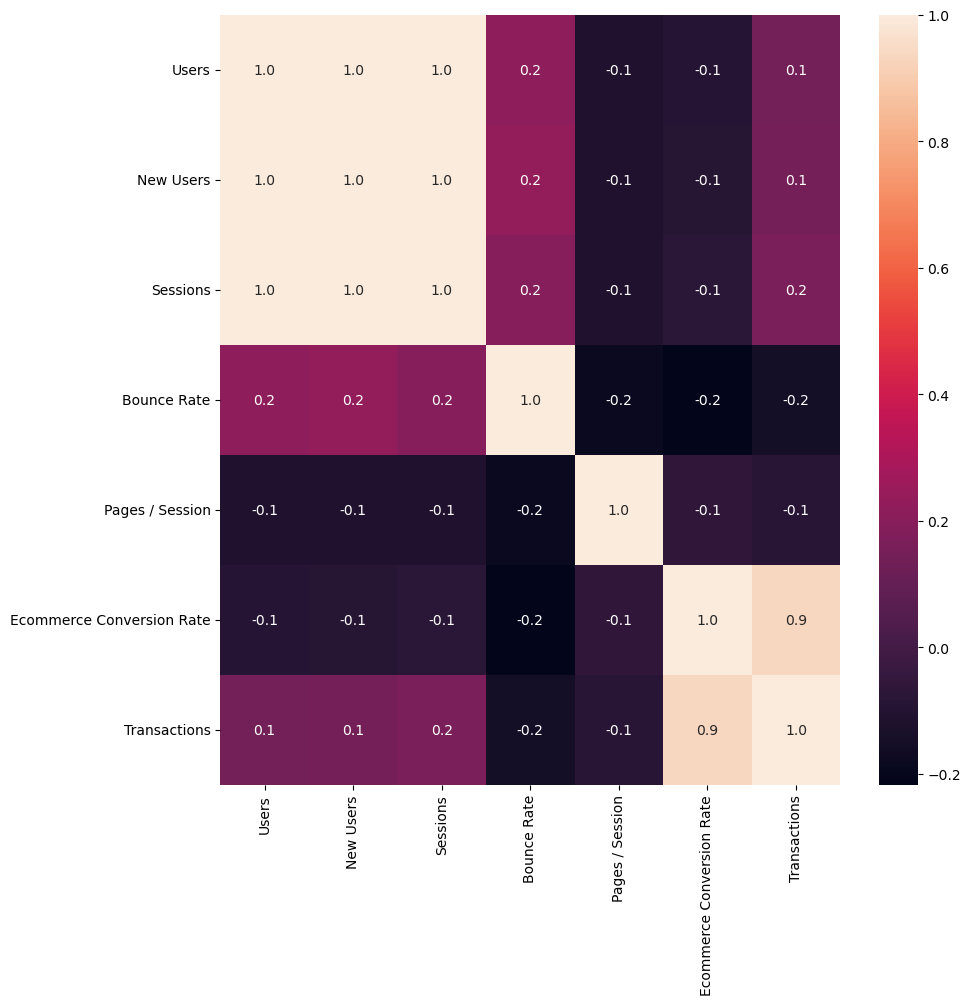

In [18]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[con].corr(), annot= True, fmt ='.1f')
plt.show()


## 2. Bivariate Analysis
1. Con vs Con - Scatterplot 
2. Cat vs Cat - Boxplot
3. Cat vs Con - Crosstab

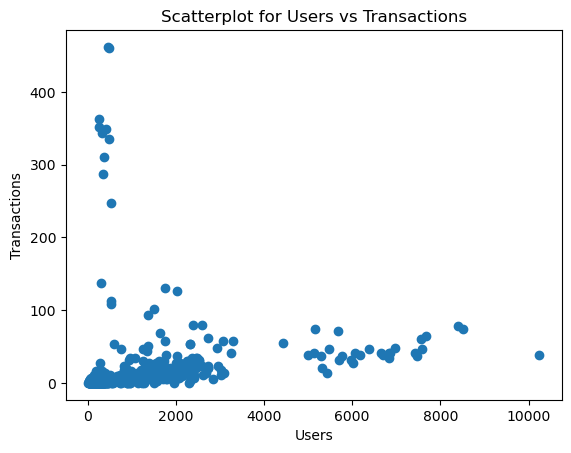

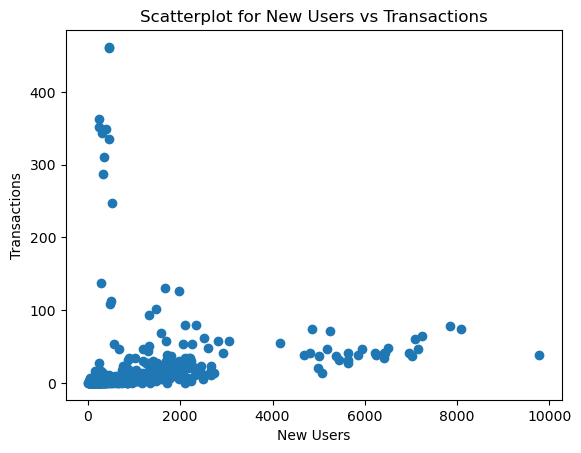

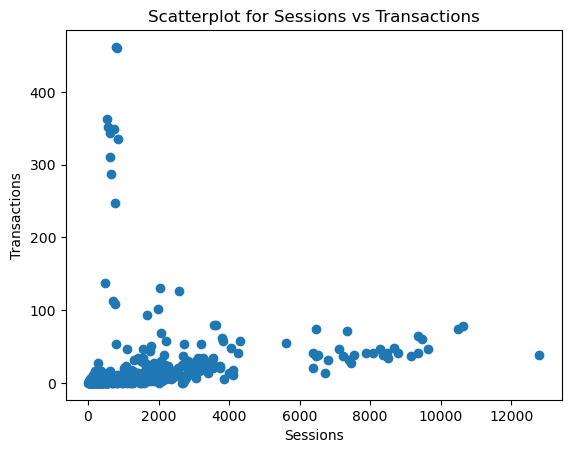

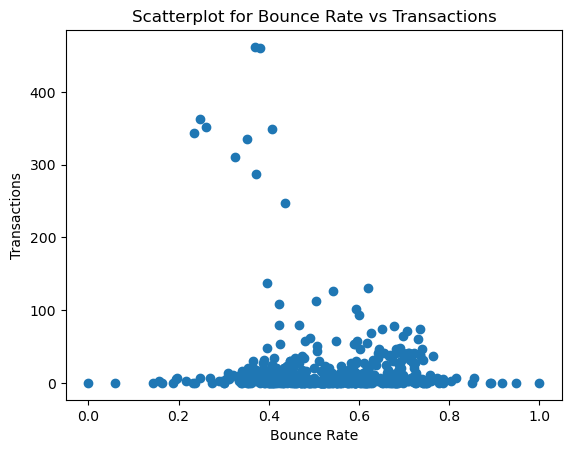

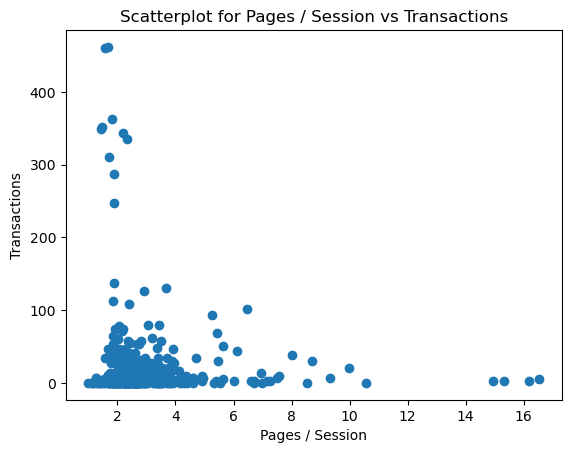

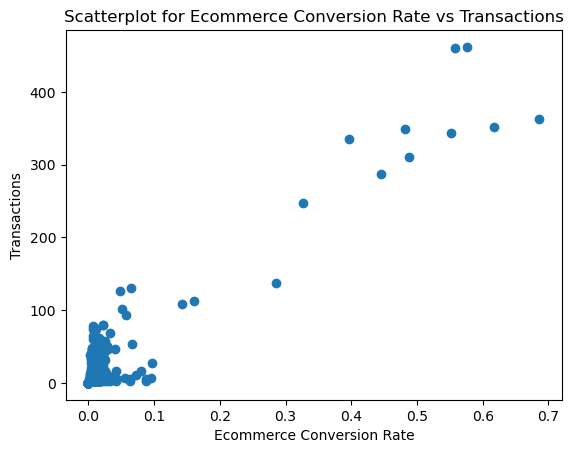

In [19]:
## Scatter plot compared with Transactions
for i in con:
    if i!='Transactions':
        plt.scatter(df[i],df['Transactions'])
        plt.xlabel(f'{i}')
        plt.ylabel('Transactions')
        plt.title(f'Scatterplot for {i} vs Transactions')
        plt.show()

#### Above Graph showsTransactions are dependant on Ecommerce Conversion Rate

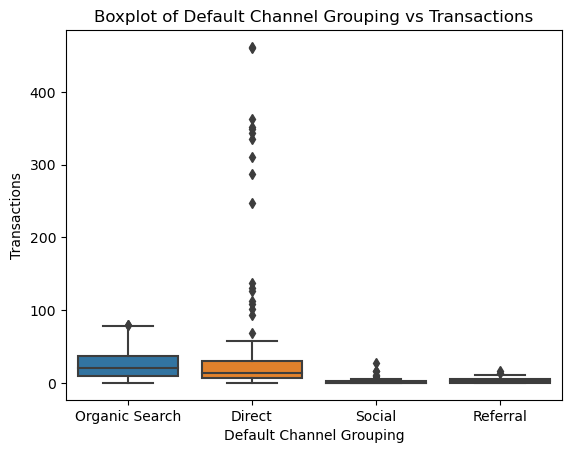

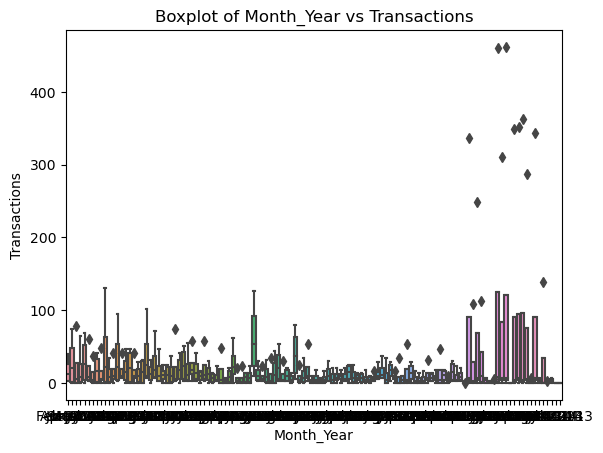

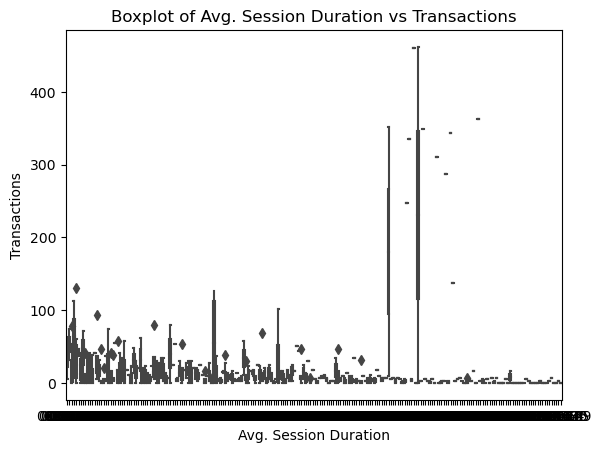

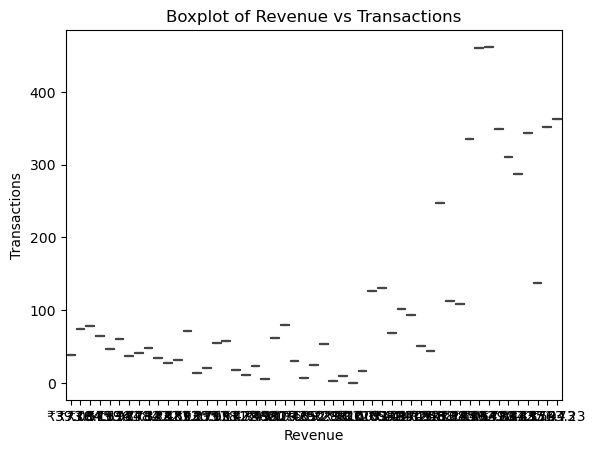

In [20]:
# Boxplot for categorical Vs Continous features for Transactions
for i in cat:
    sns.boxplot(data = df, x= i, y= 'Transactions')
    plt.title(f'Boxplot of {i} vs Transactions')
    plt.show()

## 3. Multivariate Analysis
#### Pairplot

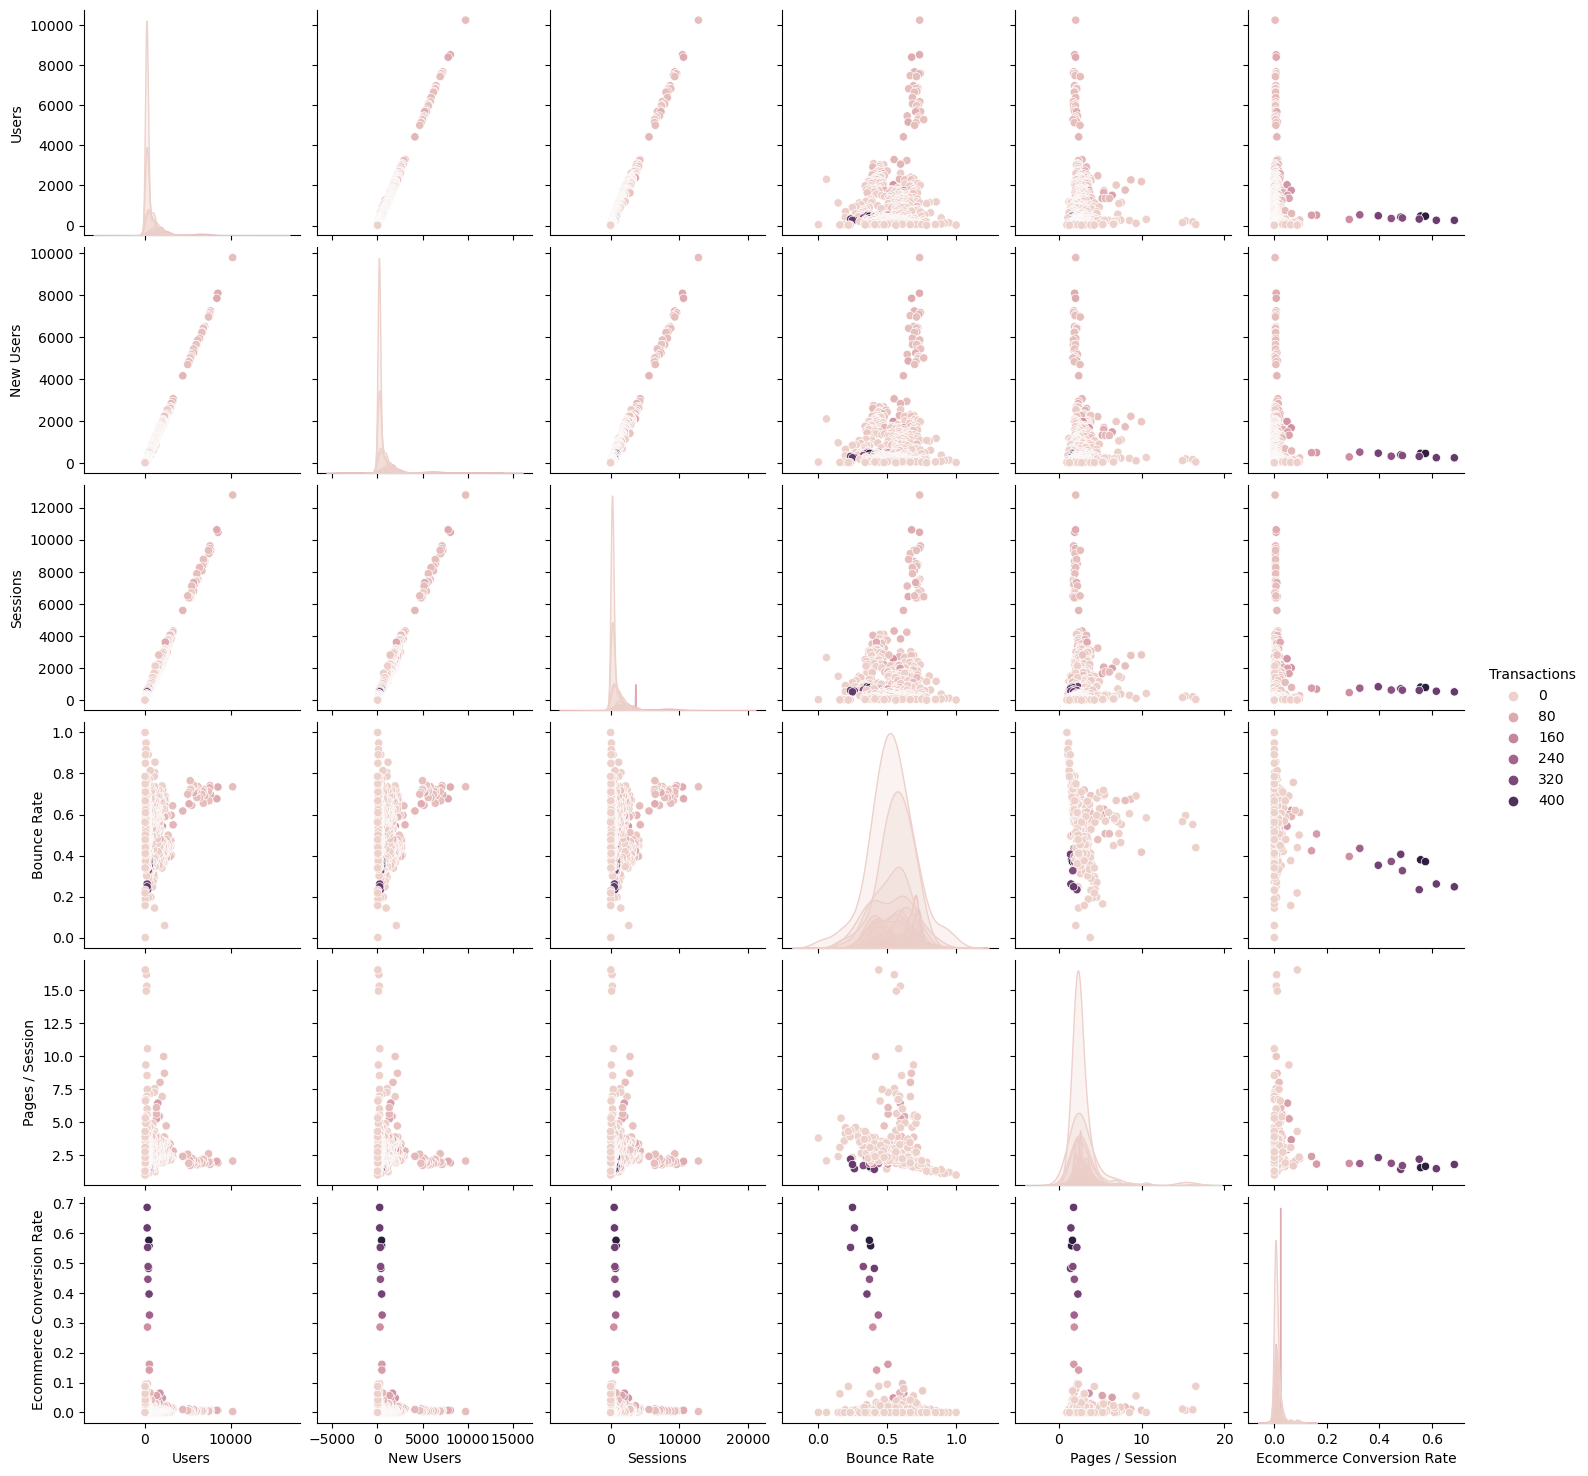

In [21]:
sns.pairplot(data = df, hue ='Transactions')
plt.show()

## EDA Complete

## Data Preprocessing
1. Seperate X and Y value
2. Seperate cat, con for X feature
3. Create a Feature Selction Pipeline (Cat- Ordinal Encoder, Con- StandardScaler)
4. Forward or Backward Selection
5. Create Final Pipeline (cat- OnehotEncoder, Con- StandardSceler)
6. Train Test Split

In [22]:
X = df.drop(labels=['Transactions'], axis =1)
Y = df[['Transactions']]

In [23]:
X.head()

,Default Channel Grouping,Month_Year,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Revenue
0,Organic Search,Feb 2022,10246,9782,12793,0.7352,2.06,00:01:38,0.0030,₹39.08
1,Organic Search,Apr 2022,8520,8085,10474,0.7342,1.93,00:01:37,0.0071,₹73.57
2,Organic Search,Jun 2021,8400,7844,10626,0.6769,2.04,00:02:05,0.0073,₹78.16
3,Organic Search,Sep 2021,7665,7239,9357,0.6972,1.84,00:01:52,0.0068,₹64.37
4,Organic Search,May 2022,7591,7163,9623,0.7406,1.81,00:01:38,0.0048,₹45.98


In [24]:
Y.head()

,Transactions
0,39
1,74
2,78
3,64
4,46


In [25]:
cat1,con1 = catconsep(X)

In [26]:
cat1

['Default Channel Grouping', 'Month_Year', 'Avg. Session Duration', 'Revenue']

In [27]:
con1

['Users',
 'New Users',
 'Sessions',
 'Bounce Rate',
 'Pages / Session',
 'Ecommerce Conversion Rate']

In [28]:
# import libraries to build the pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
# build the pipeline
num_pipe = Pipeline(steps = (['Imputer', SimpleImputer(strategy='mean')],
                            ['Scaler',StandardScaler()]))
cat_pipe = Pipeline(steps = (['Imputer', SimpleImputer(strategy='most_frequent')],
                             ['ORD',OrdinalEncoder()]))
pre = ColumnTransformer([('con',num_pipe,con1),
                        ('cat',cat_pipe,cat1)])

In [30]:
X_pre = pre.fit_transform(X)
X_pre

array([[  5.63589746,   5.76186969,   5.57428329, ...,  38.        ,
         52.        ,  28.        ],
       [  4.55679064,   4.631365  ,   4.42292923, ...,   8.        ,
         51.        ,  46.        ],
       [  4.48176583,   4.47081601,   4.4983953 , ...,  67.        ,
         77.        ,  47.        ],
       ...,
       [ -0.75684141,  -0.74069736,  -0.7658596 , ...,  30.        ,
        212.        ,  11.        ],
       [ -0.75996744,  -0.74735914,  -0.76933501, ...,  60.        ,
        184.        ,   0.        ],
       [ -0.76121786,  -0.74735914,  -0.77032798, ...,  50.        ,
        147.        ,   0.        ]])

In [31]:
cols = pre.get_feature_names_out()
cols

array(['con__Users', 'con__New Users', 'con__Sessions',
       'con__Bounce Rate', 'con__Pages / Session',
       'con__Ecommerce Conversion Rate', 'cat__Default Channel Grouping',
       'cat__Month_Year', 'cat__Avg. Session Duration', 'cat__Revenue'],
      dtype=object)

In [32]:
X_pre = pd.DataFrame(X_pre, columns=cols)

In [33]:
X_pre.head()

,con__Users,con__New Users,con__Sessions,con__Bounce Rate,con__Pages / Session,con__Ecommerce Conversion Rate,cat__Default Channel Grouping,cat__Month_Year,cat__Avg. Session Duration,cat__Revenue
0,5.635897,5.761870,5.574283,1.388921,-0.499696,-0.231384,1.0,38.0,52.0,28.0
1,4.556791,4.631365,4.422929,1.381863,-0.575151,-0.177515,1.0,8.0,51.0,46.0
2,4.481766,4.470816,4.498395,0.977471,-0.511304,-0.174888,1.0,67.0,77.0,47.0
3,4.022239,4.067778,3.868353,1.120738,-0.627389,-0.181457,1.0,118.0,65.0,43.0
4,3.975974,4.017149,4.000419,1.427031,-0.644802,-0.207734,1.0,88.0,52.0,32.0


In [34]:
## Forwrad Feature selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [35]:
model1 = LinearRegression()
sel = SequentialFeatureSelector(model1, direction = 'backward', n_jobs= -1)
sel_features = sel.fit_transform(X_pre,Y)
imp_cols= sel.get_feature_names_out()
imp_cols

array(['con__Users', 'con__Sessions', 'con__Bounce Rate',
       'con__Ecommerce Conversion Rate', 'cat__Default Channel Grouping'],
      dtype=object)

In [36]:
len(imp_cols)

5

In [37]:
sel_cols =[]
for i in imp_cols:
    s= i.split('__')[1]
    sel_cols.append(s)
sel_cols

['Users',
 'Sessions',
 'Bounce Rate',
 'Ecommerce Conversion Rate',
 'Default Channel Grouping']

In [38]:
X_sel= X[sel_cols]
X_sel

,Users,Sessions,Bounce Rate,Ecommerce Conversion Rate,Default Channel Grouping
0,10246,12793,0.7352,0.0030,Organic Search
1,8520,10474,0.7342,0.0071,Organic Search
2,8400,10626,0.6769,0.0073,Organic Search
3,7665,9357,0.6972,0.0068,Organic Search
4,7591,9623,0.7406,0.0048,Organic Search
...,...,...,...,...,...
475,25,39,0.2308,0.0000,Social
476,23,23,1.0000,0.0000,Referral
477,21,23,0.2174,0.0870,Social
478,16,16,0.5625,0.0000,Social


In [39]:
## Build Final preprocessing Pipeline
cat_sel,con_sel = catconsep(X_sel)
cat_sel

['Default Channel Grouping']

In [40]:
con_sel

['Users', 'Sessions', 'Bounce Rate', 'Ecommerce Conversion Rate']

In [41]:
num_pipe1 = Pipeline(steps=(['imputer',SimpleImputer(strategy='mean')],
                            ['Scaler',StandardScaler()]))
cat_pipe1 = Pipeline(steps=(['imputer',SimpleImputer(strategy='most_frequent')],
                          ['OHE',OneHotEncoder(handle_unknown='ignore')]))
pre1 = ColumnTransformer([('con',num_pipe1,con_sel),
                          ('cat',cat_pipe1,cat_sel)])

In [42]:
X_pre1 = pre1.fit_transform(X_sel)
X_pre1

array([[ 5.63589746,  5.57428329,  1.38892064, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.55679064,  4.42292923,  1.38186319, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.48176583,  4.4983953 ,  0.97747137, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.75684141, -0.7658596 , -2.26542639, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75996744, -0.76933501,  0.17009922, ...,  0.        ,
         0.        ,  1.        ],
       [-0.76121786, -0.77032798,  1.74532181, ...,  0.        ,
         0.        ,  1.        ]])

In [43]:
cols2 = pre1.get_feature_names_out()
cols2

array(['con__Users', 'con__Sessions', 'con__Bounce Rate',
       'con__Ecommerce Conversion Rate',
       'cat__Default Channel Grouping_Direct',
       'cat__Default Channel Grouping_Organic Search',
       'cat__Default Channel Grouping_Referral',
       'cat__Default Channel Grouping_Social'], dtype=object)

In [44]:
X_pre1 = pd.DataFrame(X_pre1,columns=cols2)
X_pre1.head()

,con__Users,con__Sessions,con__Bounce Rate,con__Ecommerce Conversion Rate,cat__Default Channel Grouping_Direct,cat__Default Channel Grouping_Organic Search,cat__Default Channel Grouping_Referral,cat__Default Channel Grouping_Social
0,5.635897,5.574283,1.388921,-0.231384,0.0,1.0,0.0,0.0
1,4.556791,4.422929,1.381863,-0.177515,0.0,1.0,0.0,0.0
2,4.481766,4.498395,0.977471,-0.174888,0.0,1.0,0.0,0.0
3,4.022239,3.868353,1.120738,-0.181457,0.0,1.0,0.0,0.0
4,3.975974,4.000419,1.427031,-0.207734,0.0,1.0,0.0,0.0


### train-test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre1,Y, test_size=0.2, random_state=59)

In [47]:
xtrain.shape

(384, 8)

In [48]:
xtest.shape

(96, 8)

In [49]:
ytrain.shape

(384, 1)

In [50]:
ytest.shape

(96, 1)

### Linear Regression Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(xtrain,ytrain)

LinearRegression()

In [54]:
model.score(xtrain,ytrain)

0.9318272667718311

In [55]:
model.score(xtest,ytest)

0.9444468014497788

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_evaluation(xtrain,ytrain,xtext,ytest,model):
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    
    tr_mae = mean_absolute_error(ytrain,ypred_tr)
    tr_mse = mean_squared_error(ytrain,ypred_tr)
    tr_rmse = tr_mse**(1/2)
    tr_r2 = r2_score(ytrain,ypred_tr)
    
    print('\nTrain Results\n')
    print(f'MAE: {tr_mae:.4f}')
    print(f'MSE: {tr_mse:.4f}')
    print(f'RMSE: {tr_rmse:.4f}')
    print(f'R2 : {tr_r2:.4f}')
    
    ts_mae = mean_absolute_error(ytest,ypred_ts)
    ts_mse = mean_squared_error(ytest,ypred_ts)
    ts_rmse = ts_mse**(1/2)
    ts_r2 = r2_score(ytest,ypred_ts)
    
    print('-----------------------------------------------------------------\n')
    print('\nTrain Results\n')
    print(f'MAE: {ts_mae:.2f}')
    print(f'MSE: {ts_mse:.2f}')
    print(f'RMAE: {ts_rmse:.2f}')
    print(f'R2 : {ts_r2:.4f}')
    
    

In [57]:
model_evaluation(xtrain,ytrain,xtest,ytest,model)


Train Results

MAE: 7.4548
MSE: 200.0616
RMSE: 14.1443
R2 : 0.9318
-----------------------------------------------------------------


Train Results

MAE: 7.27
MSE: 129.95
RMAE: 11.40
R2 : 0.9444


#### With Linear Regression we are getting 94% of accuracy.

In [58]:
## Ridge with Hyperparameter Tuning
import numpy as np
alphas = np.arange(0.1,100,0.1)
alphas

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [59]:
params ={'alpha':alphas}

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model2 = Ridge()
gscv =  GridSearchCV(model2, param_grid=params,cv=5, scoring='neg_root_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_root_mean_squared_error')

In [61]:
gscv.best_score_

-15.989013625310724

In [62]:
best_ridge = gscv.best_estimator_
best_ridge

Ridge(alpha=0.1)

In [63]:
best_ridge.score(xtrain,ytrain)

0.9317566026101487

In [64]:
best_ridge.score(xtest,ytest)

0.9443124383933631

In [65]:
## With Ridge model, we got accuracy of 94.43%

In [66]:
from sklearn.linear_model import Lasso
model3 = Lasso()
gscv2 = GridSearchCV(model3,param_grid=params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [67]:
best_lasso = gscv.best_estimator_
best_lasso

Ridge(alpha=0.1)

In [68]:
best_lasso.score(xtrain,ytrain)

0.9317566026101487

In [69]:
best_lasso.score(xtest,ytest)

0.9443124383933631

## With Ridge & Lasso Model, Accuracy is 94.43%, So winner is Linear Regression Model with accuracy of 94.44%

In [70]:
## Predictions for train and test with best ridge model
ypreds = model.predict(xtest)
ypreds[0:5]

array([[  2.50497132],
       [  3.72343281],
       [ -5.28378124],
       [  4.10591718],
       [322.61589263]])

In [71]:
ytest.head()

,Transactions
242,5
266,2
367,0
436,2
270,349


In [72]:
df1 = df[['Users','Month_Year','Ecommerce Conversion Rate']]
df1

,Users,Month_Year,Ecommerce Conversion Rate
0,10246,Feb 2022,0.0030
1,8520,Apr 2022,0.0071
2,8400,Jun 2021,0.0073
3,7665,Sep 2021,0.0068
4,7591,May 2022,0.0048
...,...,...,...
475,25,Mar 2014,0.0000
476,23,Jul 2013,0.0000
477,21,Feb 2014,0.0870
478,16,Jun 2014,0.0000


In [73]:
ytest['Pred_Trans'] = ypreds

In [74]:
ytest

,Transactions,Pred_Trans
242,5,2.504971
266,2,3.723433
367,0,-5.283781
436,2,4.105917
270,349,322.615893
...,...,...
354,0,-1.840427
219,23,25.433459
434,7,31.314279
444,2,4.516836


In [75]:
ytest.to_csv('Predicted_Transactions.csv',index= False)